Task
First load the dataset in a notebook and preprocess it. Then use visualisations to address the following questions:

Which states have the most sales?
What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
Who is an outstanding customer in New York?
Are there any differences among states in profitability?
The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
What are the Top 20 customers by Sales?
Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Sample - Superstore.csv',  encoding='latin-1')
# df = pd.read_excel('/content/US Superstore data.xls', engine='xlrd')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


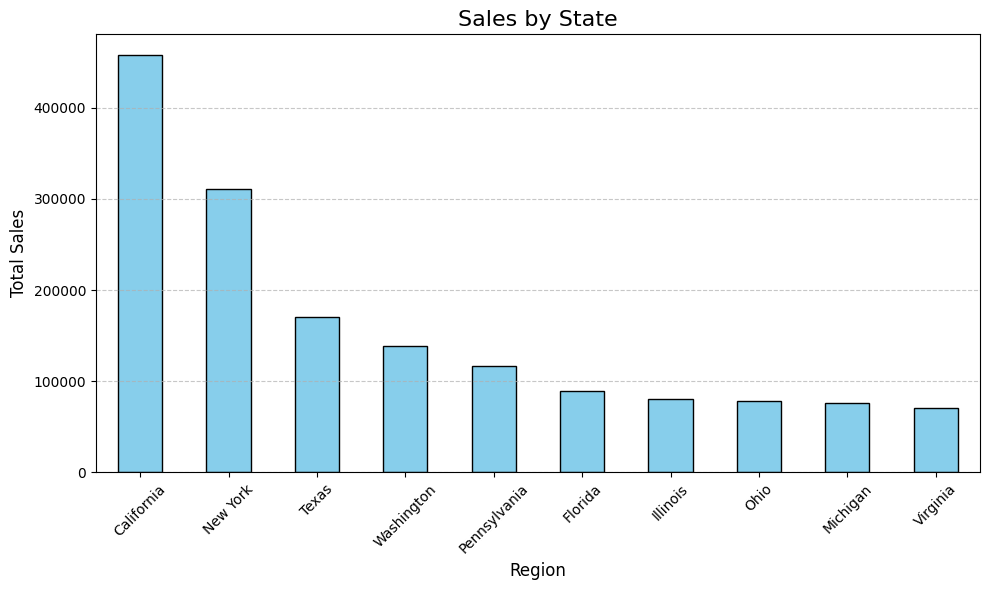

In [71]:
# as we can see California has highest sales with New York following on a second place
country_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
country_sales = country_sales.head(10)
plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales by State', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

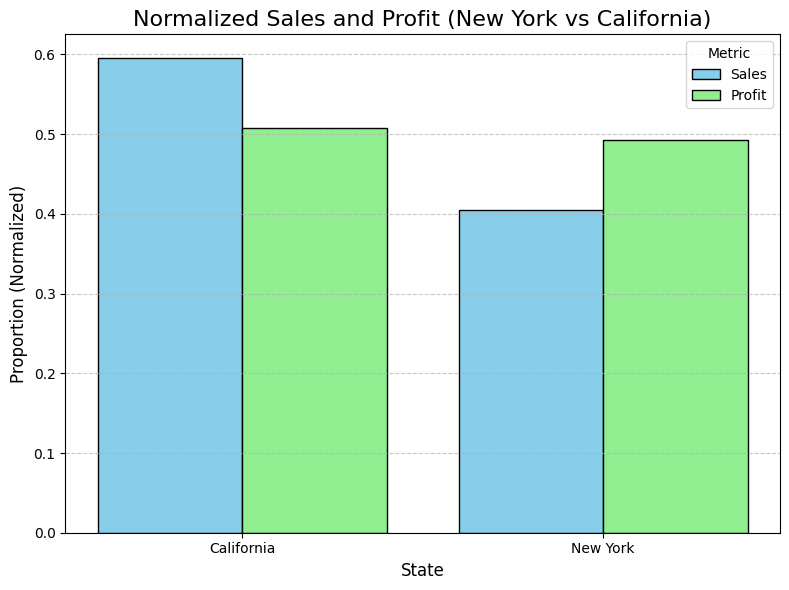

In [8]:
filtered_df = df[df['State'].isin(['New York', 'California'])]
state_totals = filtered_df.groupby('State')[['Sales', 'Profit']].sum()
state_totals_normalized = state_totals.div(state_totals.sum(axis=0), axis=1)
fig, ax = plt.subplots(figsize=(8, 6))
x = range(len(state_totals_normalized.index))
width = 0.4
ax.bar(
    [pos - width/2 for pos in x],
    state_totals_normalized['Sales'],
    width=width,
    label='Sales',
    color='skyblue',
    edgecolor='black'
)
ax.bar(
    [pos + width/2 for pos in x],
    state_totals_normalized['Profit'],
    width=width,
    label='Profit',
    color='lightgreen',
    edgecolor='black'
)
ax.set_title('Normalized Sales and Profit (New York vs California)', fontsize=16)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Proportion (Normalized)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(state_totals_normalized.index, fontsize=10)
ax.legend(title='Metric', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
# California outperforms New York both in terms of Sales and Profit but New York is still close
# Sales ratio is 3 to 2, while profit seems almost the same

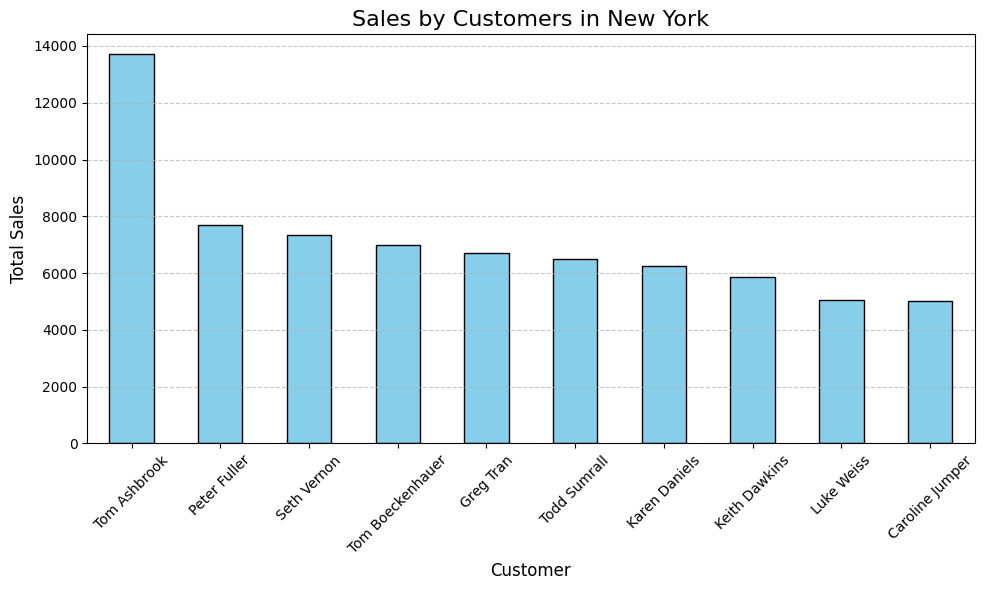

In [75]:
ny_df = df[df['State'] == 'New York']
country_sales = ny_df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
country_sales = country_sales.head(10)
plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales by Customers in New York', fontsize=16)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
# Most outstanding customer in NY is Tom Ashbrook

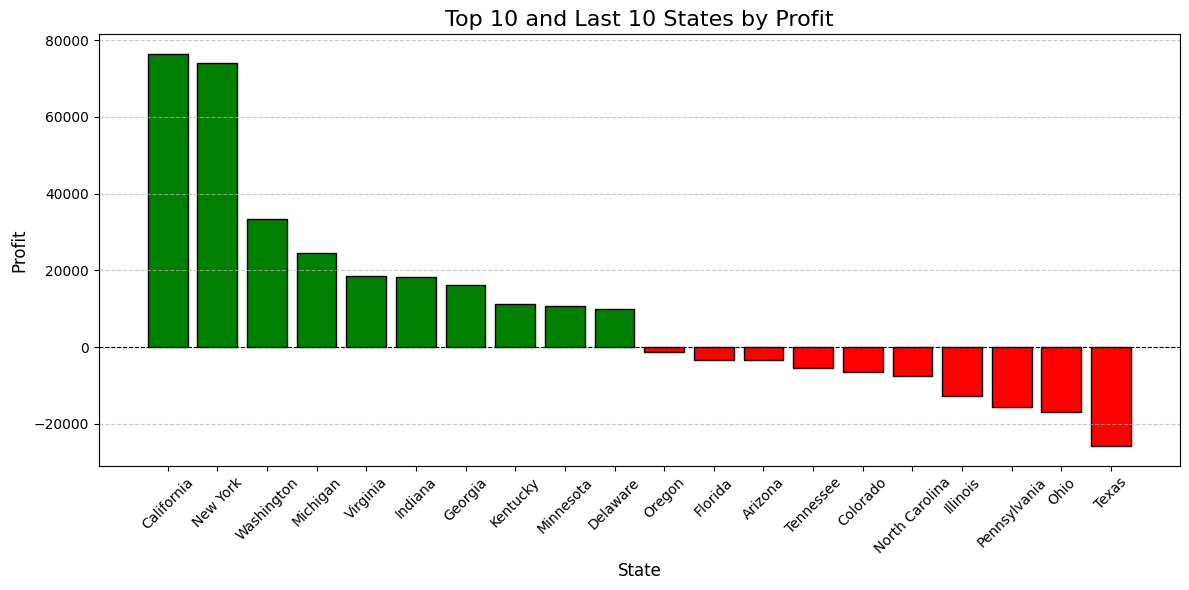

In [6]:
sorted_df = df.sort_values(by="Profit", ascending=False)
sorted_df = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

top_10 = sorted_df.head(10)
last_10 = sorted_df.tail(10)
combined_df = pd.concat([top_10, last_10])
plt.figure(figsize=(12, 6))
plt.bar(
    combined_df.index,
    combined_df.values,
    color=["green" if x > 0 else "red" for x in combined_df.values],
    edgecolor="black"
)
plt.title("Top 10 and Last 10 States by Profit", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
# California and New York were expected to be top in profits
# Texas, Ohio, Pennsylvania and Illinois are most unprofitable states

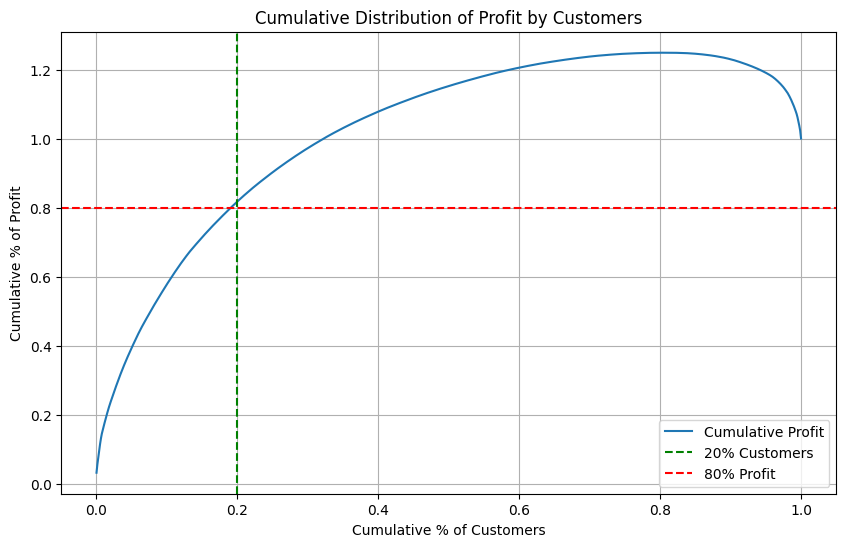

In [68]:
import numpy as np
customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)

cumulative_profit = customer_profit.cumsum() / customer_profit.sum()
cumulative_customers = np.arange(1, len(customer_profit) + 1) / len(customer_profit)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_customers, cumulative_profit, label='Cumulative Profit')
plt.axvline(0.2, color='green', linestyle='--', label='20% Customers')
plt.axhline(0.8, color='red', linestyle='--', label='80% Profit')
plt.title('Cumulative Distribution of Profit by Customers')
plt.xlabel('Cumulative % of Customers')
plt.ylabel('Cumulative % of Profit')
plt.legend()
plt.grid()
plt.show()
# as we can see top 20% of customers are indeed responsible for 80% of profit

In [51]:
import plotly.express as px
cities_df = df.groupby('City')[['Sales', 'Profit']].sum().sort_values(by=['Sales', 'Profit'], ascending=False)
cities_df = cities_df.head(20).reset_index()
fig = px.scatter(
    cities_df,
    x='Profit',
    y='Sales',
    size_max=7,
    size=[10]*len(cities_df),
    color='City',
    hover_data=['City', 'Profit', 'Sales'],
    title='Sales vs Profit by City',
    labels={'Profit': 'Profit', 'Sales': 'Sales'}
)
fig.show()
# If we get top 20 based on both profit and sales, then 7 out of these 20 cities have negative profit
# Also we can separate 6 cities as most outstanding(those whose profit is over 10k) and New York as best performing

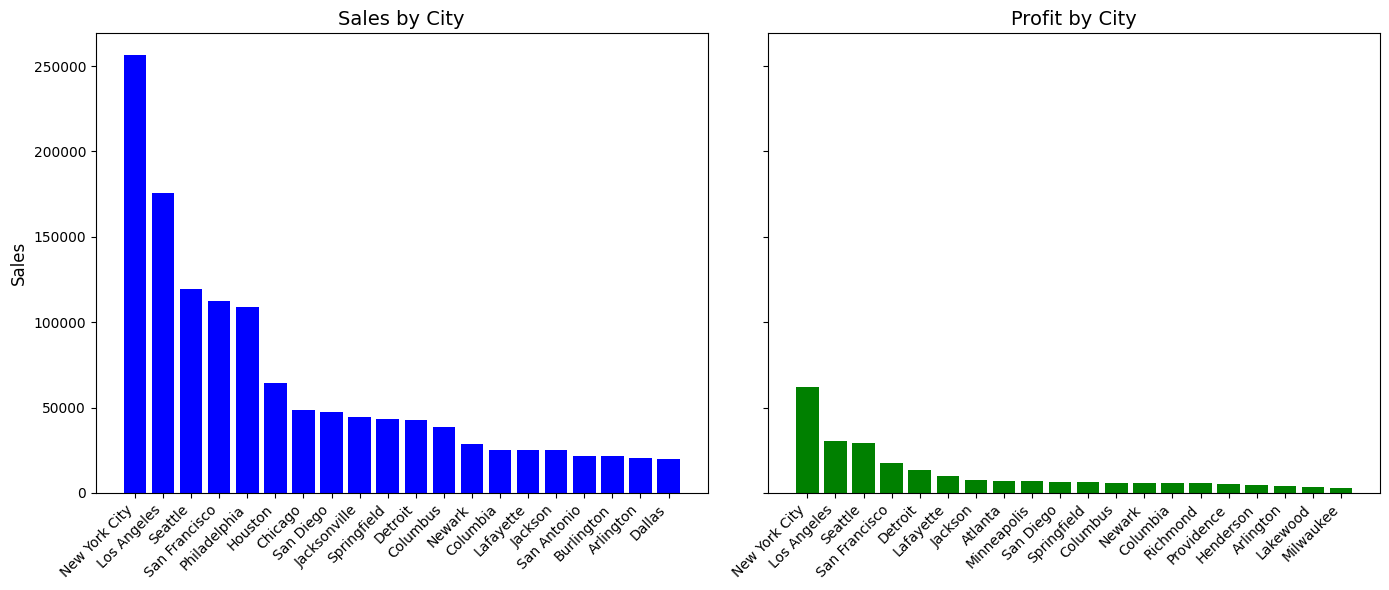

In [63]:
sales_df = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
profit_df = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(sales_df.index, sales_df.values, color='blue')
axes[0].set_title('Sales by City', fontsize=14)
axes[0].set_ylabel('Sales', fontsize=12)
axes[0].set_xticks(range(len(sales_df.index)))
axes[0].set_xticklabels(sales_df.index, rotation=45, ha='right', fontsize=10)

axes[1].bar(profit_df.index, profit_df.values, color='green')
axes[1].set_title('Profit by City', fontsize=14)
axes[1].set_xticks(range(len(profit_df.index)))
axes[1].set_xticklabels(profit_df.index, rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# On this way of comparing we can see that top 4 cities are identical between profit and sales
# Starting from top 5 we can see that even tho Philadelphia and Houston have high sales, Detroit and Lafayette brought more profit
# While Philadelphia and Houston are not even in top 20 by profit

In [66]:
customer_sales_df = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)

fig = px.bar(
    customer_sales_df,
    x=customer_sales_df.index,
    y=customer_sales_df.values,
    color=customer_sales_df.values,
    color_continuous_scale='Reds',
)
fig.update_layout(
    title='Top 20 Customers by Sales',
    xaxis_title='Customer Name',
    yaxis_title='Sales',
)
fig

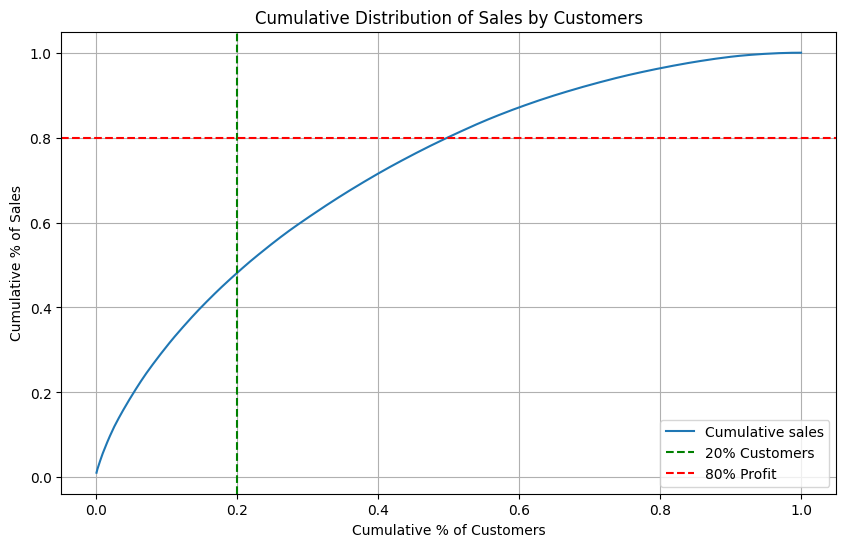

In [70]:
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

cumulative_sales = customer_sales.cumsum() / customer_sales.sum()
cumulative_customers = np.arange(1, len(customer_sales) + 1) / len(customer_sales)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_customers, cumulative_sales, label='Cumulative sales')
plt.title('Cumulative Distribution of Sales by Customers')
plt.axvline(0.2, color='green', linestyle='--', label='20% Customers')
plt.axhline(0.8, color='red', linestyle='--', label='80% Profit')
plt.xlabel('Cumulative % of Customers')
plt.ylabel('Cumulative % of Sales')
plt.legend()
plt.grid()
plt.show()
# as we can see Paretto doesn't apply to customer sales, as point of 80% of sales is being reached only with 50% of top customers

To be honest I'd say that we don't have enough data to make an analysys, as If they already had any marketing, what kind and how many etc.
But for now I would say that It would be better to extract from non-proffitable states such as Texac, Illinois etc.
Focus more on keeping sales of states such as California and New York high and, if possible, even higher.
Look into why one of the most performing in terms of sales cities such as Philadelphia and Houston do not match it in profit
Furthermore, considering that top 20% customers in profit indeed bring 80% of profit, but top 20% in sales do not bring 80% of sales so that's an issue that should be looked into and company needs to pay more attention to those 20% of customers